<a href="https://colab.research.google.com/github/tesseract314/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Copy_of_LS_DS_142_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 142
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [0]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

# Alternative to first table
'''
        In   Out
Male   [[2  1]]
Female [[1  2]]

Females want to eat outside in this data, chi-square test would have low p-value/ not independent

'''

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


'\n        In   Out\nMale   [[2  1]]\nFemale [[1  2]]\n\nFemales want to eat outside in this data, chi-square test would have low p-value/ not independent\n\n'

In [0]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=39.46422589504301, pvalue=2.6943389573324703e-09)


In [0]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## Live Lecture - let's explore some more of scipy.stats

In [0]:
# Taking requests! Come to lecture with a topic or problem and we'll try it.


In [0]:
# Play with distributions
from scipy.stats import chi2

chi2_5 = chi2(5)
chi2_5

In [0]:
chi2_5.mean()

5.0

In [0]:
chi2_5.median()

4.351460191095526

In [0]:
chi2_500 = chi2(500)
print(chi2_500.mean())
print(chi2_500.median())

500.0
499.3334915888738


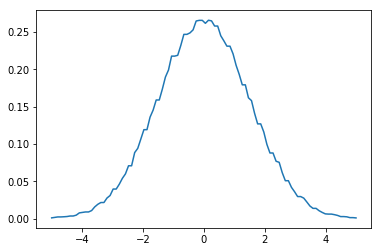

In [0]:
# From Cole
import scipy
import numpy as np
import matplotlib.pyplot as plt
data = scipy.stats.norm.rvs(size=100000, loc=0, scale=1.5, random_state=123)
X = np.linspace(-5.0, 5.0, 100)
hist = np.histogram(data, bins=100)
hist_dist = scipy.stats.rv_histogram(hist)
plt.plot(X, hist_dist.pdf(X), label='PDF')

In [0]:
from scipy.stats import normaltest

normaltest(chi2_500.rvs(10000000))

NormaltestResult(statistic=27642.481991751738, pvalue=0.0)

In [0]:
# Calculating chi square from hand

# 1 male wants to eat outside, 2 inside
# 2 females want to eat outside, 1 inside
chi_data = [[1, 2], [2, 1]] 

import pandas as pd

chi_data = pd.DataFrame(chi_data, columns=('Outside', 'Inside'))
chi_data

,Outside,Inside
0,1,2
1,2,1


In [0]:
# Explaining margins
# Total number of males (first row) = 3
# Total number of females (second row) = 3
# Total mumber of peopl who prefer outside = 3
# Total number of peopl who prefer inside = 3

# Explaning margin proportions
# Proportion of first row = obs / total = (3 males) / (3 males + 3 females)
# = 3/6 = 0.5
# All the other rows/cols also have 0.5 proportion margins

# Expected value for top left cell ( males who want to eat outside)
# (0.5(proportion of males) * 0.5(proportion of outside eaters)) * 6 = 1.5

# Because of symmetry of this little examples., we kow the expected value of
# all cells is 1.5 (i.e. the same, becuase margins are all the same)

# chi square test statisic is the sum of square deviation from these expected vales

expected_values = [[1.5, 1.5], [1.5, 1.5]]
deviation = (((0.5) ** 2) / 1.5) * 4 # 0.5^2 deviation per cell
print(deviation)
  

0.6666666666666666


In [0]:
#  Close but not same as scipy

In [0]:
# a little more properly, but not fully from scratch

def lazy_chisquare(observed, expected):
  chisquare = 0
  for row_obs, row_exp in zip(observed, expected):
    for obs, exp in zip(row_obs, row_exp):
      chisquare += (obs - exp)**2 / exp
  return chisquare

chi_data = [[1, 2], [2, 1]]
expected_values = [[1.5, 1.5], [1.5, 1.5]]
lazy_chisquare(chi_data, expected_values)

# Three degrees of freedom (n - 1)

0.6666666666666666

In [0]:
# Running above with scipy library
from scipy.stats import chisquare

chisquare(chi_data, axis=None)

Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)

In [0]:
# Confidence intervals!
# Similar to hypothesis testing, but centered at sample mean
# Generally better than reporting the "point estimate" (sample mean)
# Why? Because point estimates aren't always perfect

import numpy as np
from scipy import stats

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2., n - 1)
  return (mean, mean - interval, mean + interval)

def report_confidence_interval(confidence_interval):
  """
  Return a string with a pretty report of a confidence interval.
  
  Arguments:
    confidence_interval - tuple of (mean, lower bound, upper bound)
  
  Returns:
    None, but prints to screen the report
  """
  #print('Mean: {}'.format(confidence_interval[0]))
  #print('Lower bound: {}'.format(confidence_interval[1]))
  #print('Upper bound: {}'.format(confidence_interval[2]))
  s = "our mean lies in the interval [{:.2}, {:.2}]".format(
      confidence_interval[1], confidence_interval[2])
  return s

In [0]:
stats.t.ppf??

In [0]:
x = 2
print('x is: {}'.format(x))

x is: 2


In [0]:
coinflips = np.random.binomial(n=1, p=0.5, size=100)
print(coinflips)

[1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0
 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1]


In [0]:
stats.ttest_1samp(coinflips, 0.5)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

In [0]:
df = pd.DataFrame(coinflips)
df.describe()

,0
count,100.000000
mean,0.500000
std,0.502519
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [0]:
coinflip_interval = confidence_interval(coinflips)  # Default 95% conf
coinflip_interval

(0.5, 0.400289346502771, 0.599710653497229)

In [0]:
report_confidence_interval(coinflip_interval)

'our mean lies in the interval [0.4, 0.6]'

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):

1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.

In [0]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

cols = [
  'Class Name',
  'handicapped-infants',
  'water-project-cost-sharing',
  'adoption-of-the-budget-resolution',
  'physician-fee-freeze',
  'el-salvador-aid',
  'religious-groups-in-schools',
  'anti-satellite-test-ban',
  'aid-to-nicaraguan-contras',
  'mx-missile',
  'immigration',
  'synfuels-corporation-cutback',
  'education-spending',
  'superfund-right-to-sue',
  'crime',
  'duty-free-exports',
  'export-administration-act-south-africa'
]

df = pd.read_csv(url, names=cols)
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
df = df.replace({'?': np.nan, 'n': 0, 'y': 1})
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
ct = pd.crosstab(df['Class Name'], df['immigration'], normalize='index')
ct

immigration,0.0,1.0
Class Name,,
democrat,0.528517,0.471483
republican,0.442424,0.557576


In [0]:
dems, repubs = df[df['Class Name'] == 'democrat'], df[df['Class Name'] == 'republican']
dems.head(5)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [0]:
repubs.head(5)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [0]:
dems_immigration, repubs_immigration = dems['immigration'].dropna(), repubs['immigration'].dropna()

In [0]:
# Confidence interval for democrats' vote on immigration
dems_immigration_interval = confidence_interval(dems_immigration, confidence=0.95)
dems_immigration_interval

(0.4714828897338403, 0.41075744059137587, 0.5322083388763047)

In [0]:
report_dems = report_confidence_interval(dems_immigration_interval)
report_dems

'our mean lies in the interval [0.41, 0.53]'

In [0]:
repubs_immigration_interval = confidence_interval(repubs_immigration, confidence=0.95)
repubs_immigration_interval

(0.5575757575757576, 0.4809959592103161, 0.6341555559411991)

In [0]:
report_repubs = report_confidence_interval(repubs_immigration_interval)
report_repubs

'our mean lies in the interval [0.48, 0.63]'

In [0]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
import seaborn as sns
sns.__version__

'0.9.0'

In [0]:
#sns.catplot(dems['immigration'], data=dems, kind='bar')

In [0]:
#sns.catplot??

In [0]:
import random

In [0]:
sample_list = []

# Calculated the mean of a (n=100) sample 500 times
for _ in range(500):
  random_sample = [dems_immigration.sample(100).mean()]
  sample_list.append(random_sample)
  
#sample_list

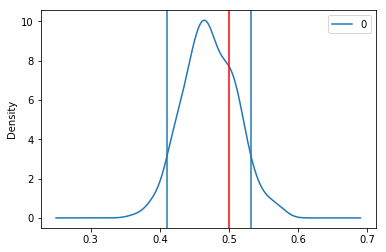

In [0]:
# Made the sample list into a dataframe
dem_imm_means = pd.DataFrame(sample_list)

# Plotted with 'density'
dem_imm_means.plot.density() 

# Made vertical lines with lower and upper confidence limits
plt.axvline(dems_immigration_interval[1]) 
plt.axvline(dems_immigration_interval[2])

# Made red vertical line with another random sample. The higher n is, the more likely
# this line will stay within the confidence interval
plt.axvline([dems_immigration.sample(150).mean()], color='r'); 

# Theoretically, you could run this cell 100 times, and the red line would
# fall within the confidence interval 95 times

#### Assignment Summary:

For the assignment, I specifically focused on the votes for republicans and democats on the immigration issue. The democrats mostly voted 'no', but only by a small margin. The republicans mostly voted 'yes', but, again, only by a small margin. As a result, the confidence intervals for both republicans and democrats, on the immigration issue, were overlapping. This indicates a similarity between republican and democrats on this issue in 1984. Today, the two parties are far from similar on immigration.